In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 

In [136]:
df = pd.read_csv("datasets/nilai-gizi.csv", sep=None, engine='python', on_bad_lines='skip')
df.head()

,name,serving_size,energy_kcal,protein_g,carbohydrate_g,fat_g,sugar_g,sodium_mg,fiber_g,energy_percentage_dv,...,carbohydrate_percentage_dv,fat_percentage_dv,sodium_percentage_dv,Lemak jenuh,Natrium,Protein,Karbohidrat total,Energi,Lemak total,Serat pangan
0,Ikan sunu,mentah,Tidak Diketahui,20.30 g,199.0,34.1,7.1,3.8,0.0,377.00,...,9.26,56.83,2.18,5.67,25.13,0.0,0.0,0.0,0.0,0.0
1,Soto pekalongan,Tidak Diketahui,1.30 g,94.0,3.0,5.1,6.8,0.0,0.0,0.30,...,5.00,1.57,10.15,0.00,0.00,0.0,0.0,0.0,0.0,0.0
2,Marie duo,1 g,15.0,1.0,14.0,3.5,5.0,85.0,1.0,4.19,...,4.31,5.22,5.67,10.00,6.00,0.0,0.0,0.0,0.0,0.0
3,Kaparende,Tidak Diketahui,1.30 g,38.0,2.4,2.6,2.0,0.0,170.0,1.50,...,4.00,0.80,2.99,11.33,0.00,0.0,0.0,0.0,0.0,0.0
4,Kacang lebui / iris,3.60 g,346.0,16.5,66.6,1.5,0.0,17.0,37.3,16.09,...,20.49,2.24,1.13,0.00,0.00,0.0,0.0,0.0,0.0,0.0


In [137]:
df.shape

(1650, 21)

In [138]:
df.drop_duplicates(inplace=True)

In [139]:
#Data Cleaning dan Pre-processing EDA = utk mengetahui penyakit data
df.isnull().sum()

name                          0
serving_size                  0
energy_kcal                   0
protein_g                     0
carbohydrate_g                0
fat_g                         0
sugar_g                       0
sodium_mg                     0
fiber_g                       0
energy_percentage_dv          0
protein_percentage_dv         0
carbohydrate_percentage_dv    0
fat_percentage_dv             0
sodium_percentage_dv          0
Lemak jenuh                   0
Natrium                       0
Protein                       0
Karbohidrat total             0
Energi                        0
Lemak total                   0
Serat pangan                  0
dtype: int64

In [140]:
df['name'] #data baru yg telah diproses

0                             Ikan sunu
1                       Soto pekalongan
2                             Marie duo
3                             Kaparende
4                   Kacang lebui / iris
                     ...               
1645     V-soy Soya bean Milk Low Sugar
1646                   Prenagen Esensis
1647                       Pisang ketip
1648                               Sapi
1649    Kacang tanah rebus dengan kulit
Name: name, Length: 1650, dtype: object

In [141]:
# Persentil
print(df.describe())

           sugar_g    sodium_mg      fiber_g  energy_percentage_dv  \
count  1650.000000  1650.000000  1650.000000           1650.000000   
mean      5.928497    91.857091    23.443285             12.351758   
std      13.795731   283.333177   106.850195             51.231305   
min       0.000000     0.000000     0.000000              0.000000   
25%       0.000000     0.000000     0.000000              2.200000   
50%       0.400000     0.000000     0.700000              5.580000   
75%       6.000000    34.000000     4.000000             12.420000   
max     201.000000  4393.000000  1724.000000           1068.000000   

       protein_percentage_dv  carbohydrate_percentage_dv  fat_percentage_dv  \
count            1650.000000                 1650.000000        1650.000000   
mean               11.158273                   10.115291          11.801727   
std                32.564440                   11.120286          18.878371   
min                 0.000000                    0.000

<Axes: >

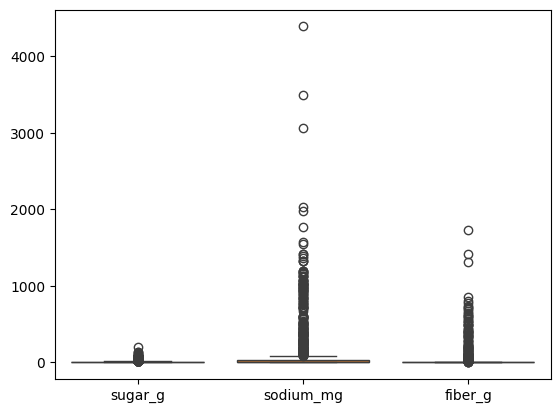

In [142]:
# deteksi outliers dgn seaborn
cols = ['fat_g', 'sugar_g', 'energy_kcal', 'protein_g', 'carbohydrate_g', 'sodium_mg', 'fiber_g']

df_plot = df.reset_index()
sns.boxplot(data=df_plot[cols])

In [143]:
cols_to_fix = [
    'energy_kcal', 'protein_g', 'fat_g',
    'sugar_g', 'sodium_mg', 'fiber_g'
]

dirty_mask = {}

for col in cols_to_fix:
    # coba konversi ke numerik TANPA cleaning
    numeric_try = pd.to_numeric(df[col], errors='coerce')

    # sel dianggap kotor jika:
    # - gagal jadi angka
    # - ATAU mengandung teks "Tidak Diketahui"
    dirty_mask[col] = (
        numeric_try.isna()
        & df[col].notna()
    )

for col in cols_to_fix:
    df[col] = df[col].astype(str)

    # hapus satuan
    df[col] = (
        df[col]
        .str.replace(' g', '', regex=False)
        .str.replace(' mg', '', regex=False)
    )

    # ubah tidak diketahui jadi NaN
    df[col] = df[col].replace(
        ['Tidak Diketahui', 'tidak diketahui', 'TIDAK DIKETAHUI'],
        np.nan
    )

    # konversi ke numerik
    df[col] = pd.to_numeric(df[col], errors='coerce')

    mean_val = df[col].mean()
    df[col] = df[col].fillna(mean_val)

    print(f"✅ Kolom '{col}' selesai | NaN diisi rata-rata = {mean_val:.2f}")

    print("\n📋 LAPORAN DATA YANG BENAR-BENAR DIUBAH")
    print("=" * 80)

    total_perubahan = 0

    for col in cols_to_fix:
        jumlah = dirty_mask[col].sum()
        total_perubahan += jumlah

        if jumlah > 0:
            print(f"🔧 {col}: {jumlah} sel diperbaiki")
        else:
            print(f"✅ {col}: tidak ada perubahan")

    print("=" * 80)
    print(f"📊 TOTAL SEL DATA YANG BERUBAH: {total_perubahan}")
    contoh = df.loc[dirty_mask['energy_kcal'], ['name', 'energy_kcal']].head(10)
    print("\nContoh data yang diperbaiki:")
    print(contoh)



✅ Kolom 'energy_kcal' selesai | NaN diisi rata-rata = 161.66

📋 LAPORAN DATA YANG BENAR-BENAR DIUBAH
🔧 energy_kcal: 455 sel diperbaiki
🔧 protein_g: 65 sel diperbaiki
🔧 fat_g: 2 sel diperbaiki
✅ sugar_g: tidak ada perubahan
✅ sodium_mg: tidak ada perubahan
✅ fiber_g: tidak ada perubahan
📊 TOTAL SEL DATA YANG BERUBAH: 522

Contoh data yang diperbaiki:
                    name  energy_kcal
0              Ikan sunu   161.658751
1        Soto pekalongan     1.300000
3              Kaparende     1.300000
7                Gembili   161.658751
10                Kunyit     1.300000
13       Daun gedi besar     2.400000
23                Genjer     0.400000
24  Taoge kacang kedelai     1.000000
27       Daun kedongdong     1.800000
33          Parede baleh     1.500000
✅ Kolom 'protein_g' selesai | NaN diisi rata-rata = 38.66

📋 LAPORAN DATA YANG BENAR-BENAR DIUBAH
🔧 energy_kcal: 455 sel diperbaiki
🔧 protein_g: 65 sel diperbaiki
🔧 fat_g: 2 sel diperbaiki
✅ sugar_g: tidak ada perubahan
✅ sodium_m

In [144]:
# 1. KONFIGURASI AMBANG BATAS PER SAJIAN
# Batas merah (jika melebihi maka buruk)
LIMIT_GULA_GRAM = 4.0
LIMIT_GARAM_MG = 200.0
LIMIT_LEMAK_GRAM = 4.0
LIMIT_KALORI = 150.0

# Batas bonus sehat/nutrisi tinggi (lebih dari ini dianggap poin baik/pengurang)
BONUS_PROTEIN_GRAM = 8.0
BONUS_SERAT_GRAM = 3.0

# === 2. FUNGSI LOGIKA PELABELAN ===
def klasifikasi_nutrisi(row):
    """
    Fungsi ini menerima satu baris data (row) dan mengembalikan Label.
    Logika: Sistem Poin (Semakin tinggi skor, semakin tidak sehat).
    """
    skor = 0
    
    # A. PEMBERIAN POIN NEGATIF
    if row['sugar_g'] > LIMIT_GULA_GRAM:
        skor += 1
    
    if row['sodium_mg'] > LIMIT_GARAM_MG:
        skor += 1
        
    if row['fat_g'] > LIMIT_LEMAK_GRAM:
        skor += 1
        
    if row['energy_kcal'] > LIMIT_KALORI:
        skor += 1
    
    # B. PEMBERIAN POIN POSITIF (BONUS POINTS) 
    # Protein & Serat bisa menetralkan nilai buruk
    if row['protein_g'] > BONUS_PROTEIN_GRAM:
        skor -= 2
        
    if row['fiber_g'] > BONUS_SERAT_GRAM:
        skor -= 2
        
    # C. PENENTUAN LABEL AKHIR
    if skor <= 0:
        return 'Sehat'
    elif skor == 1:
        return 'Kurang Sehat'
    else:
        return 'Tidak Sehat'

# === 3. EKSEKUSI KE DATASET ===
# pastikan df adalah dataframe yang sudah bersih tadi
df['Label_Kelas'] = df.apply(klasifikasi_nutrisi, axis=1)

# === 4. CEK HASIL ===
print("Contoh 5 Data Teratas dengan Label Baru:")
print(df[['name', 'energy_kcal', 'sugar_g', 'Label_Kelas']].head())

print("\nJumlah Makanan per Kategori:")
print(df['Label_Kelas'].value_counts())

Contoh 5 Data Teratas dengan Label Baru:
                  name  energy_kcal  sugar_g   Label_Kelas
0            Ikan sunu   161.658751      7.1  Kurang Sehat
1      Soto pekalongan     1.300000      6.8         Sehat
2            Marie duo    15.000000      5.0  Kurang Sehat
3            Kaparende     1.300000      2.0         Sehat
4  Kacang lebui / iris   346.000000      0.0         Sehat

Jumlah Makanan per Kategori:
Label_Kelas
Sehat           937
Kurang Sehat    388
Tidak Sehat     325
Name: count, dtype: int64


In [145]:

# print("=== PERBAIKAN STRUKTUR KOLOM (MANUAL MAPPING) ===")

# # 1. BACA RAW (TANPA HEADER)
# # Kita baca polosan, agar kolom nama tidak dianggap sebagai index
# df = pd.read_csv("datasets/nilai-gizi.csv", header=None, engine='python', on_bad_lines='skip')

# # 2. CEK & BUANG BARIS HEADER (Jika ada)
# # Jika baris pertama isinya tulisan "name", "energy_kcal", kita buang
# if str(df.iloc[0,0]).lower().strip() == 'name':
#     print("🧹 Membuang baris header asli yang bikin error...")
#     df = df.iloc[1:] # Ambil data dari baris ke-2 dst

# # 3. MAPPING KOLOM SECARA PAKSA
# # Kita beri nama kolom berdasarkan urutan aslinya di CSV
# # Urutan ini berdasarkan standar file nilai-gizi.csv umumnya
# # 0=Name, 1=Manuf, 2=Serving, 3=Kalori, 4=Protein, 5=Karbo, 6=Lemak, 7=Gula, 8=Garam, 9=Serat
# nama_kolom_baru = [
#     'name', 'manufacturer', 'serving_size', 'energy_kcal', 'protein_g', 
#     'carbohydrate_g', 'fat_g', 'sugar_g', 'sodium_mg', 'fiber_g'
# ]

# # Ambil hanya 10 kolom pertama (sisanya abaikan dulu biar gak error)
# df = df.iloc[:, :10] 
# df.columns = nama_kolom_baru

# print(f"✅ Struktur Diperbaiki! Total Data: {len(df)}")
# print("Contoh Nama Makanan sekarang (Harusnya beneran nama):")
# print(df['name'].head(5).values)

# # 4. KONVERSI ANGKA (PENTING)
# cols_angka = ['energy_kcal', 'sugar_g', 'sodium_mg', 'fat_g', 'protein_g', 'fiber_g']
# for col in cols_angka:
#     df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# # 5. TERAPKAN LOGIKA LABEL (V3)
# LIMIT_GULA_GRAM = 4.0
# LIMIT_GARAM_MG = 200.0
# LIMIT_LEMAK_GRAM = 4.0
# LIMIT_KALORI = 150.0
# BONUS_PROTEIN_GRAM = 8.0
# BONUS_SERAT_GRAM = 3.0

# def klasifikasi_final(row):
#     skor = 0
#     if row['sugar_g'] > LIMIT_GULA_GRAM: skor += 1
#     if row['sodium_mg'] > LIMIT_GARAM_MG: skor += 1
#     if row['fat_g'] > LIMIT_LEMAK_GRAM: skor += 1
#     if row['energy_kcal'] > LIMIT_KALORI: skor += 1
    
#     if row['protein_g'] > BONUS_PROTEIN_GRAM: skor -= 2
#     if row['fiber_g'] > BONUS_SERAT_GRAM: skor -= 2
    
#     if skor <= 0: return 'Sehat'
#     elif skor == 1: return 'Kurang Sehat'
#     else: return 'Tidak Sehat'

# df['Label_Kelas'] = df.apply(klasifikasi_final, axis=1)

# # 6. CARI REGAL (PEMBUKTIAN)
# print("\n=== HASIL PENCARIAN 'REGAL' ===")
# hasil = df[df['name'].str.contains("Regal", case=False, na=False)]
# if not hasil.empty:
#     display(hasil[['name', 'Label_Kelas', 'sugar_g', 'energy_kcal']])
# else:
#     print("Masih tidak ketemu. Coba cek output 'Contoh Nama Makanan' di atas.")

In [146]:
# def audit_nutrisi_dynamic():
#     print("\n" + "="*50)
#     print("   🕵️‍♂️ ALAT AUDIT LOGIKA NUTRISI")
#     print("   Ketik 'stop' atau 'keluar' untuk berhenti")
#     print("="*50)
    
#     # Pastikan ambil variabel global batas ambang
#     # (Ini mengambil settingan LIMIT yang Anda buat di cell atas)
#     print(f"⚙️ Config saat ini: Gula > {LIMIT_GULA_GRAM}g | Garam > {LIMIT_GARAM_MG}mg | Kalori > {LIMIT_KALORI}")
    
#     while True:
#         try:
#             # 1. INPUT DYNAMIC
#             keyword = input("\n>> Masukkan Nama Makanan: ")
            
#             # Cek perintah keluar
#             if keyword.lower() in ['stop', 'keluar', 'exit', 'sudah']:
#                 print("👋 Selesai. Audit ditutup.")
#                 break
            
#             # Cek input kosong
#             if not keyword.strip():
#                 continue

#             # 2. PROSES PENCARIAN (Case Insensitive)
#             # Kita cari di kolom 'name' yang sudah diperbaiki
#             mask = df['name'].astype(str).str.contains(keyword, case=False, na=False)
#             hasil = df[mask]
            
#             if hasil.empty:
#                 print(f"❌ Tidak ditemukan makanan dengan kata kunci '{keyword}'")
#                 print("   Tips: Coba potong kata, misal 'Beng-beng' jadi 'beng'")
#                 continue
                
#             # 3. TAMPILKAN HASIL BEDAH (Maksimal 3 agar tidak spam)
#             print(f"✅ Ditemukan {len(hasil)} data. Menampilkan 3 teratas:\n")
            
#             for idx, row in hasil.head(3).iterrows():
#                 print(f"📦 {row['name']}")
#                 print(f"   🏢 Manuf: {row['manufacturer']}")
#                 print("-" * 45)
                
#                 # --- BEDAH LOGIKA (AUDIT) ---
#                 poin_negatif = 0
#                 bonus = False
                
#                 # Cek Gula
#                 if row['sugar_g'] > LIMIT_GULA_GRAM:
#                     print(f"   ❌ GULA   : {row['sugar_g']}g  (Melanggar batas {LIMIT_GULA_GRAM}g)")
#                     poin_negatif += 1
#                 else:
#                     print(f"   ✅ Gula   : {row['sugar_g']}g  (Aman)")

#                 # Cek Garam
#                 if row['sodium_mg'] > LIMIT_GARAM_MG:
#                     print(f"   ❌ GARAM  : {row['sodium_mg']}mg (Melanggar batas {LIMIT_GARAM_MG}mg)")
#                     poin_negatif += 1
#                 else:
#                     print(f"   ✅ Garam  : {row['sodium_mg']}mg (Aman)")
                    
#                 # Cek Lemak
#                 if row['fat_g'] > LIMIT_LEMAK_GRAM:
#                     print(f"   ❌ LEMAK  : {row['fat_g']}g   (Melanggar batas {LIMIT_LEMAK_GRAM}g)")
#                     poin_negatif += 1
                
#                 # Cek Kalori
#                 if row['energy_kcal'] > LIMIT_KALORI:
#                     print(f"   ❌ KALORI : {row['energy_kcal']}   (Melanggar batas {LIMIT_KALORI})")
#                     poin_negatif += 1

#                 # Cek Bonus
#                 bonus_msg = []
#                 if row['protein_g'] > BONUS_PROTEIN_GRAM:
#                     bonus_msg.append(f"Protein Tinggi ({row['protein_g']}g)")
#                     bonus = True
#                 if row['fiber_g'] > BONUS_SERAT_GRAM:
#                     bonus_msg.append(f"Serat Tinggi ({row['fiber_g']}g)")
#                     bonus = True
                
#                 if bonus:
#                     print(f"   🌟 BONUS  : Dapat Potongan Poin! ({', '.join(bonus_msg)})")
#                 else:
#                     print(f"   ⚪ Bonus  : Tidak ada (Protein/Serat kurang tinggi)")

#                 print("-" * 45)
#                 print(f"   🏷️ LABEL FINAL: {row['Label_Kelas']}")
#                 print("=" * 50)
                
#         except Exception as e:
#             print(f"⚠️ Terjadi Error: {e}")
#             break

# # PANGGIL FUNGSINYA
# audit_nutrisi_dynamic()

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# cek keseimbangan data
print('Jumlah data per kategori')
print(df['Label_Kelas'].value_counts())

# seleksi fitur (membuat x dan y)
# X = data gizi
fitur_gizi = ['sugar_g', 'sodium_mg', 'fat_g', 'energy_kcal', 'protein_g', 'fiber_g']
X = df[fitur_gizi] 

# y = label kelas (jawaban)
y = df['Label_Kelas']

# encoding label "sehat" -> 0, "kurang sehat" -> 1, "tidak sehat" -> 2
le = LabelEncoder()
y_encoded = le.fit_transform(y)
print("\nContoh Label yang sudah diubah ke angka:", y_encoded[:5])
print("Mapping Label:", dict(zip(le.classes_, le.transform(le.classes_))))

# Split data Train dan Testing
# 1. Proses Split data (Cari baris ini di kodemu)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)




# Scaling supaya distribusi data jadi normal
scaler = StandardScaler()

# Model belajar scaling dari data train aja (X_train) lalu terapkan ke X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KODE PENGECEKAN DI SINI
print("=== RINGKASAN PEMBAGIAN DATA ===")
print(f"Total seluruh data di dataset : {len(df)} baris")
print(f"Data untuk LATIHAN (80%)      : {X_train.shape[0]} baris")
print(f"Data untuk UJIAN (20%)        : {X_test.shape[0]} baris")
print("================================")


Jumlah data per kategori
Label_Kelas
Sehat           937
Kurang Sehat    388
Tidak Sehat     325
Name: count, dtype: int64

Contoh Label yang sudah diubah ke angka: [0 1 0 1 1]
Mapping Label: {'Kurang Sehat': np.int64(0), 'Sehat': np.int64(1), 'Tidak Sehat': np.int64(2)}
=== RINGKASAN PEMBAGIAN DATA ===
Total seluruh data di dataset : 1650 baris
Data untuk LATIHAN (80%)      : 1320 baris
Data untuk UJIAN (20%)        : 330 baris


mulai cross-val menggunakan data X_train_scaled aja (data latihan)
Random Forest: Rata-rata Akurasi = 0.9801 (Std Dev: 0.0109)
XGBoost: Rata-rata Akurasi = 0.9849 (Std Dev: 0.0107)
KNN: Rata-rata Akurasi = 0.7951 (Std Dev: 0.0265)


/tmp/ipykernel_1959/29736151.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names, showmeans=True)


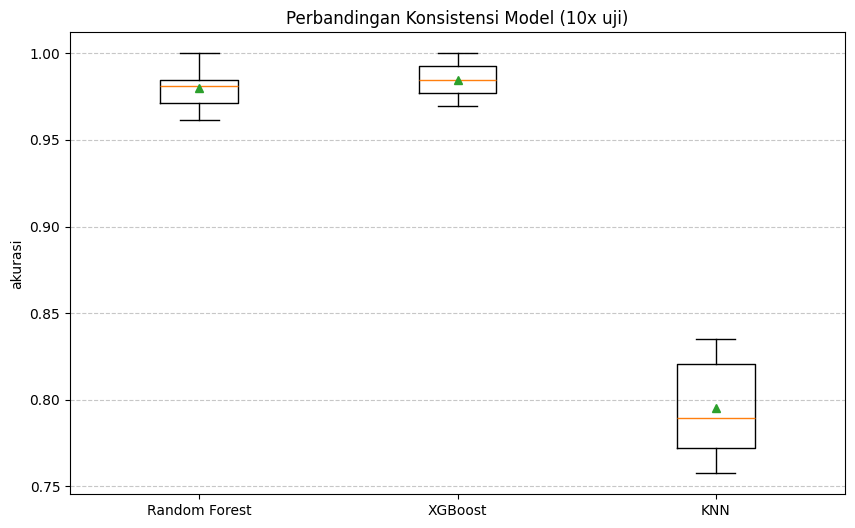


model tertinggi: XGBoost


In [148]:
# Cross-Val [TEMPAT LATIHAN]
from unittest import result
from matplotlib.lines import lineStyles
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

models = [
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')),
    ('XGBoost', XGBClassifier(eval_metric='mlogloss',random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=5))
]

#skenario uji 10x putaran
#StratifiedKFold memastikan "Tidak Sehat" tersebar rata di setiap testing
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

results = []
names = []
scoring = 'f1_weighted' # akurasi

print('mulai cross-val menggunakan data X_train_scaled aja (data latihan)')

for name, model in models:
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=skf, scoring=scoring)
    
    results.append(cv_results)
    names.append(name)
    
    print(f"{name}: Rata-rata Akurasi = {cv_results.mean():.4f} (Std Dev: {cv_results.std():.4f})")

# visualisasi perbandingan
plt.figure(figsize=(10,6))
plt.boxplot(results, labels=names, showmeans=True)
plt.title('Perbandingan Konsistensi Model (10x uji)')
plt.ylabel('akurasi')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

# menentukan mdoel dgn rata2 skor tertinggi
best_index = -1
best_score = 0

for i in range(len(results)):
    if results[i].mean() > best_score:
        best_score = results[i].mean()
        best_index = i

print(f"\nmodel tertinggi: {names[best_index]}")

In [149]:
# # 1. Pastikan data sudah termuat (Pakai separator titik koma yg benar)

# df.columns = df.columns.str.strip() # Bersihkan nama kolom

# # Konversi ke angka dulu biar bisa disortir
# cols_numeric = ['fat_g', 'sodium_mg', 'sugar_g']
# for col in cols_numeric:
#     if col in df.columns:
#         df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# print("=== 🕵️‍♂️ MENCARI TERSANGKA '12.000' ===")

# # KASUS 1: Cek apakah itu LEMAK (fat_g)?
# # Kita cari makanan dengan lemak di atas 500 gram (angka yg udh ga masuk akal buat 1 porsi)
# tersangka_lemak = df[df['fat_g'] > 500]

# if not tersangka_lemak.empty:
#     print(f"\n[DITEMUKAN] Ada {len(tersangka_lemak)} makanan dengan Lemak Raksasa:")
#     display(tersangka_lemak[['name', 'serving_size', 'fat_g', 'energy_kcal']])
# else:
#     print("\n✅ Tidak ada Lemak di atas 500g. Nilai tertinggi Lemak di data Anda adalah:", df['fat_g'].max())

# # KASUS 2: Cek apakah itu NATRIUM/GARAM (sodium_mg)?
# # Karena biasanya Natrium yang angkanya ribuan/belasan ribu
# tersangka_garam = df[df['sodium_mg'] > 10000]

# if not tersangka_garam.empty:
#     print(f"\n[DITEMUKAN] Ada {len(tersangka_garam)} makanan dengan Garam > 10.000 mg:")
#     display(tersangka_garam[['name', 'serving_size', 'sodium_mg', 'Label_Kelas' if 'Label_Kelas' in df.columns else 'name']])
# else:
#     print("\n✅ Tidak ada Garam di atas 10.000 mg.")

# # KASUS 3: Cek Top 5 Tertinggi di Kedua Kategori (Biar puas liatnya)
# print("\n=== TOP 5 JUARA LEMAK ===")
# print(df.nlargest(5, 'fat_g')[['name', 'fat_g']].to_string(index=False))

# print("\n=== TOP 5 JUARA GARAM ===")
# print(df.nlargest(5, 'sodium_mg')[['name', 'sodium_mg']].to_string(index=False))


=== LAPORAN EVALUASI RANDOM FOREST ===
              precision    recall  f1-score   support

       Sehat       0.97      0.96      0.97        78
Kurang Sehat       0.98      0.99      0.99       189
 Tidak Sehat       1.00      0.98      0.99        63

    accuracy                           0.98       330
   macro avg       0.99      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330



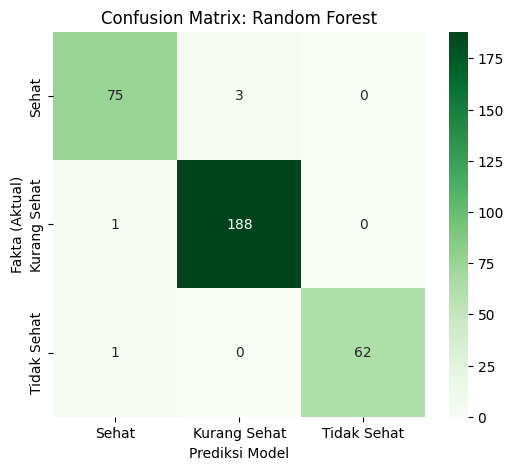

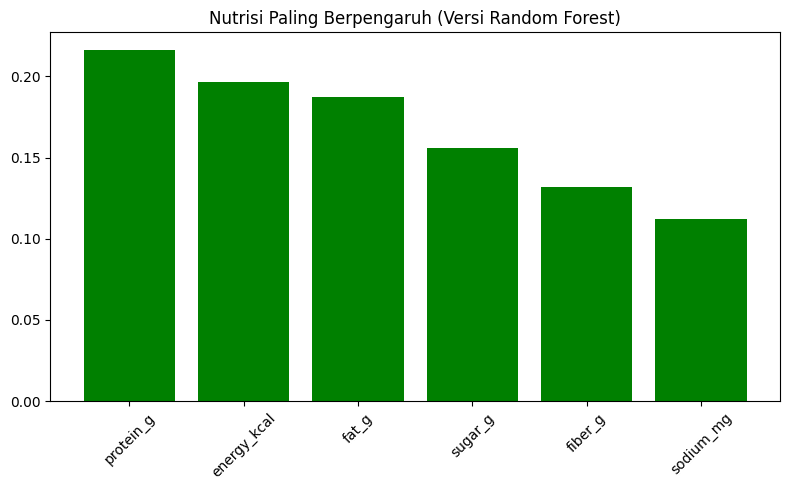

In [150]:
# RF Classifier
from sklearn.metrics import classification_report, confusion_matrix

# A. TRAINING
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# B. PREDIKSI
y_pred_rf = rf_model.predict(X_test_scaled)

# C. EVALUASI
print("\n=== LAPORAN EVALUASI RANDOM FOREST ===")
target_names = ['Sehat', 'Kurang Sehat', 'Tidak Sehat'] # Sesuaikan urutan label encoder (0,1,2)
print(classification_report(y_test, y_pred_rf, target_names=target_names))

# D. VISUALISASI KESALAHAN (Confusion Matrix)
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix: Random Forest')
plt.xlabel('Prediksi Model')
plt.ylabel('Fakta (Aktual)')
plt.show()

# E. INTROSPEKSI (Feature Importance)
# Melihat nutrisi apa yang paling menentukan label
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(8, 5))
plt.title("Nutrisi Paling Berpengaruh (Versi Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align="center", color='green')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45)
plt.tight_layout()
plt.show()


=== LAPORAN EVALUASI XGBOOST ===
              precision    recall  f1-score   support

       Sehat       0.97      0.95      0.96        78
Kurang Sehat       0.98      0.98      0.98       189
 Tidak Sehat       0.98      1.00      0.99        63

    accuracy                           0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330



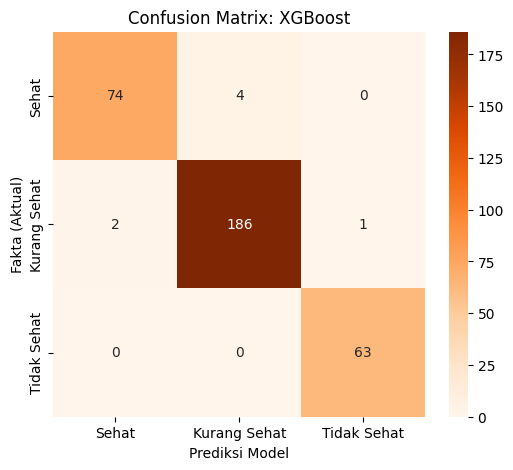

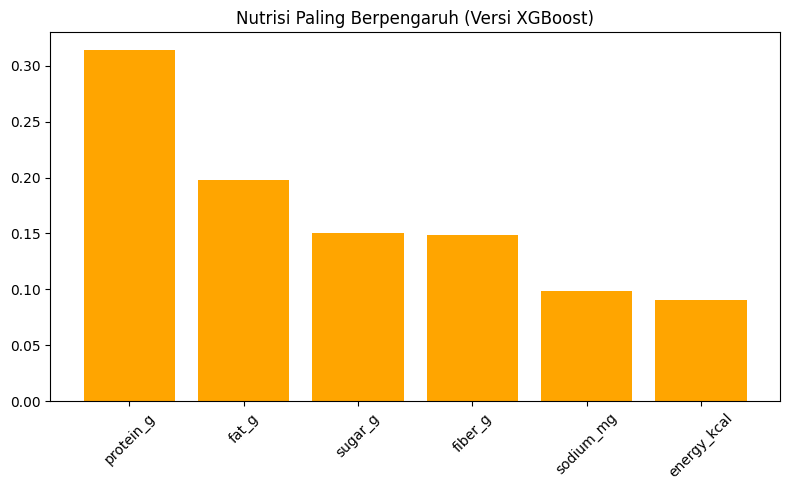

In [151]:
# XGBoost
from xgboost import XGBClassifier

# A. TRAINING
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# B. PREDIKSI
y_pred_xgb = xgb_model.predict(X_test_scaled)

# C. EVALUASI
print("\n=== LAPORAN EVALUASI XGBOOST ===")
print(classification_report(y_test, y_pred_xgb, target_names=target_names))

# D. VISUALISASI KESALAHAN
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix: XGBoost')
plt.xlabel('Prediksi Model')
plt.ylabel('Fakta (Aktual)')
plt.show()

# E. INTROSPEKSI (Feature Importance)
importances = xgb_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5))
plt.title("Nutrisi Paling Berpengaruh (Versi XGBoost)")
plt.bar(range(X.shape[1]), importances[indices], align="center", color='orange')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45)
plt.tight_layout()
plt.show()


=== LAPORAN EVALUASI KNN ===
              precision    recall  f1-score   support

       Sehat       0.69      0.68      0.68        78
Kurang Sehat       0.87      0.89      0.88       189
 Tidak Sehat       0.64      0.60      0.62        63

    accuracy                           0.78       330
   macro avg       0.73      0.72      0.73       330
weighted avg       0.78      0.78      0.78       330



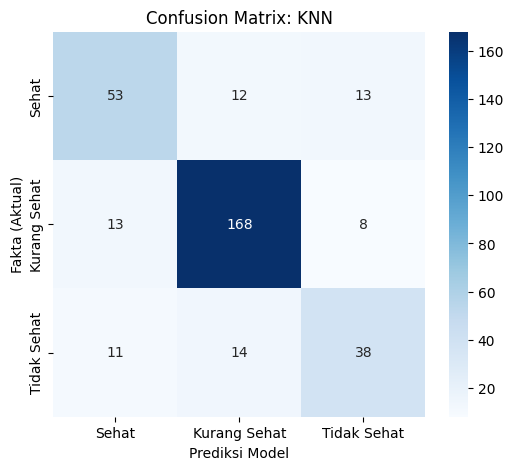

In [152]:
# A. TRAINING
knn_model = KNeighborsClassifier(n_neighbors=5) # Melihat 5 tetangga terdekat
knn_model.fit(X_train_scaled, y_train)

# B. PREDIKSI
y_pred_knn = knn_model.predict(X_test_scaled)

# C. EVALUASI
print("\n=== LAPORAN EVALUASI KNN ===")
print(classification_report(y_test, y_pred_knn, target_names=target_names))

# D. VISUALISASI KESALAHAN
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix: KNN')
plt.xlabel('Prediksi Model')
plt.ylabel('Fakta (Aktual)')
plt.show()

#Catatan: KNN tidak memiliki fitur 'Feature Importance' karena bekerja berdasarkan jarak, bukan bobot fitur

In [153]:
import joblib

model_juara = rf_model 
nama_file_model = "model/model_gizi_rf.pkl"

# 2. Simpan Model & Scaler
# Kita WAJIB menyimpan scaler juga, karena data baru nanti harus di-scaling dengan rumus yang sama
paket_penyimpanan = {
    'model': model_juara,
    'scaler': scaler,      # Scaler yang sudah di-fit dengan X_train
    'label_encoder': le    # Encoder untuk membalikkan angka 0->Sehat
}

joblib.dump(paket_penyimpanan, nama_file_model)

print(f"Model berhasil disimpan sebagai file '{nama_file_model}'")
print("   File ini siap digunakan untuk aplikasi/website!")

Model berhasil disimpan sebagai file 'model/model_gizi_rf.pkl'
   File ini siap digunakan untuk aplikasi/website!


In [154]:
import joblib

def cek_kesehatan_makanan(gula, garam, lemak, kalori, protein, serat):
    # 1. LOAD MODEL
    paket = joblib.load("model/model_gizi_rf.pkl")
    model = paket['model']
    scaler = paket['scaler']
    le = paket['label_encoder']
    
    # 2. SIAPKAN DATA INPUT
    # Urutan HARUS SAMA dengan training
    # ['sugar_g', 'sodium_mg', 'fat_g', 'energy_kcal', 'protein_g', 'fiber_g']
    data_input = [[gula, garam, lemak, kalori, protein, serat]]
    
    # 3. SCALING
    data_scaled = scaler.transform(data_input)
    
    # 4. PREDIKSI
    hasil_angka = model.predict(data_scaled)[0]
    hasil_label = le.inverse_transform([hasil_angka])[0]
    
    # 5. OUTPUT
    print("=" * 40)
    print("   🤖 HASIL PREDIKSI AI")
    print("=" * 40)
    print(f"Gula    : {gula} g")
    print(f"Garam   : {garam} mg")
    print(f"Lemak   : {lemak} g")
    print(f"Kalori  : {kalori} kkal")
    print(f"Protein : {protein} g")
    print(f"Serat   : {serat} g")
    print("-" * 40)
    
    if hasil_label == 'Sehat':
        print(f"✅ VONIS: {hasil_label.upper()}")
    elif hasil_label == 'Kurang Sehat':
        print(f"⚠️ VONIS: {hasil_label.upper()}")
    else:
        print(f"❌ VONIS: {hasil_label.upper()}")
    
    print("=" * 40)


# =================================================
# 🔥 INI YANG TADI KAMU BELUM LAKUKAN (PEMANGGILAN)
# =================================================

print("\n[TEST 1] Minuman Manis")
cek_kesehatan_makanan(
    gula=35,
    garam=50,
    lemak=10,
    kalori=300,
    protein=1,
    serat=0
)

print("\n[TEST 2] Makanan Diet")
cek_kesehatan_makanan(
    gula=0,
    garam=100,
    lemak=2,
    kalori=120,
    protein=25,
    serat=0
)



[TEST 1] Minuman Manis
   🤖 HASIL PREDIKSI AI
Gula    : 35 g
Garam   : 50 mg
Lemak   : 10 g
Kalori  : 300 kkal
Protein : 1 g
Serat   : 0 g
----------------------------------------
❌ VONIS: TIDAK SEHAT

[TEST 2] Makanan Diet
   🤖 HASIL PREDIKSI AI
Gula    : 0 g
Garam   : 100 mg
Lemak   : 2 g
Kalori  : 120 kkal
Protein : 25 g
Serat   : 0 g
----------------------------------------
✅ VONIS: SEHAT


/root/all-project-mapel/ai2/klasifikasi-gizi/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/root/all-project-mapel/ai2/klasifikasi-gizi/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
